In [19]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Loading autocorrelation ACF,PACF,plots, and seasonal decompose

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [5]:
Microsoft_df = pd.read_csv('./archive/MSFT_Stock.csv')

---

In [6]:
Microsoft_df.head()

,Unnamed: 0,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [7]:
Microsoft_df.isnull().sum()

Unnamed: 0    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

In [8]:
Microsoft_df.rename(columns={'Unnamed: 0':'date'}, inplace=True) # inplace = True updates mydata
print(Microsoft_df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [9]:
Microsoft_df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

## Create a datetime index


This is date data type object and converting to datetime.

In [10]:
Microsoft_df['date'] = pd.to_datetime(Microsoft_df.date )
Microsoft_df.set_index('date', inplace=True, drop=True)


In [11]:
Microsoft_df.index

DatetimeIndex(['2001-03-16', '2001-03-19', '2001-03-20', '2001-03-21',
               '2001-03-22', '2001-03-23', '2001-03-26', '2001-03-27',
               '2001-03-28', '2001-03-29',
               ...
               '2021-01-15', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-25', '2021-01-26', '2021-01-27',
               '2021-01-28', '2021-01-29'],
              dtype='datetime64[ns]', name='date', length=5000, freq=None)

In [12]:
subset_df=Microsoft_df[['close']]
subset_df=subset_df.resample('Q-DEC').mean()
subset_df.head()

,close
date,
2001-03-31,27.369318
2001-06-30,33.851210
2001-09-30,31.238390
2001-12-31,31.523672
2002-03-31,31.466250


In [57]:
df_train = subset_df.loc[:'2019']
df_test = subset_df.loc['2019':]
#df_train = subset_df.iloc[:-10]   #all the data except the last 10 records
#df_test = subset_df.iloc[-10:] 

In [58]:
df_train.shape , df_test.shape

((76, 1), (9, 1))

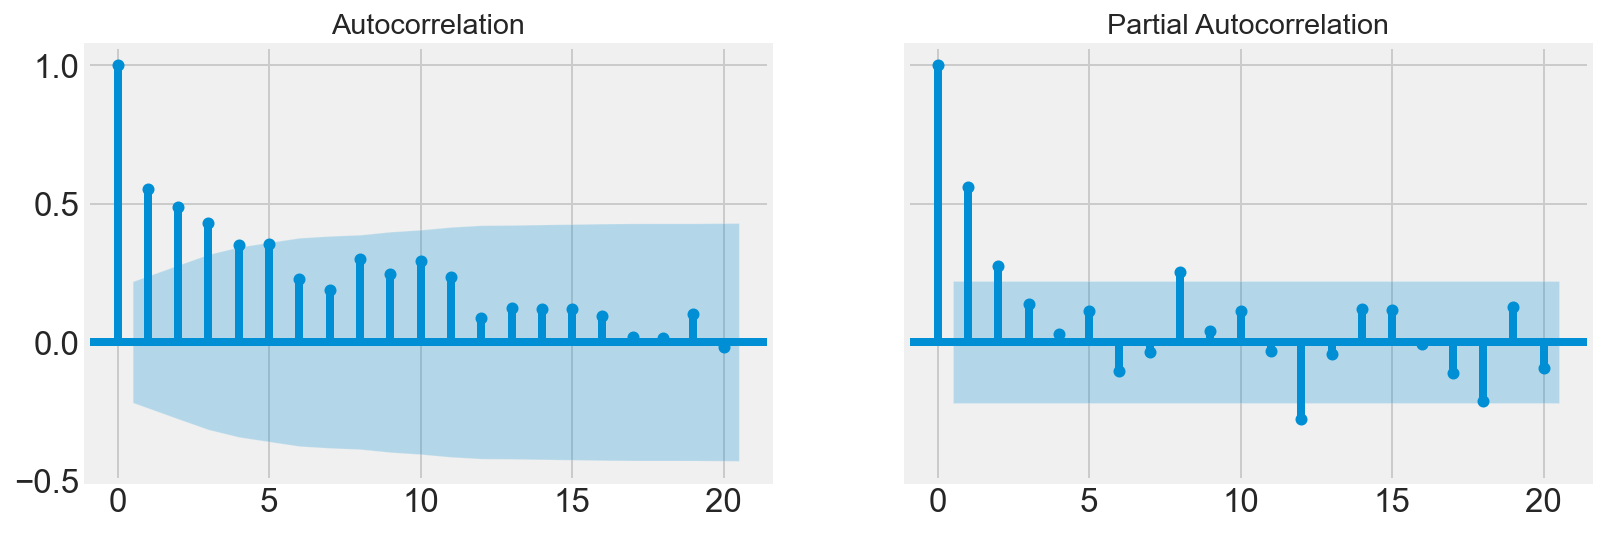

In [43]:
autocorr_plots(subset_df['close'].diff().dropna(), lags=20);

In [62]:
model = arch_model(df_train, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 311.71684360953776
Iteration:      2,   Func. Count:     19,   Neg. LLF: 333.1419740557559
Iteration:      3,   Func. Count:     29,   Neg. LLF: 547.4704543417148
Iteration:      4,   Func. Count:     42,   Neg. LLF: 265.6505526986452
Iteration:      5,   Func. Count:     53,   Neg. LLF: 266.2124061624714
Iteration:      6,   Func. Count:     63,   Neg. LLF: 260.51847412317596
Iteration:      7,   Func. Count:     72,   Neg. LLF: 258.31691190506024
Iteration:      8,   Func. Count:     81,   Neg. LLF: 4462.515317710667
Iteration:      9,   Func. Count:     91,   Neg. LLF: 421.650926432413
Iteration:     10,   Func. Count:    101,   Neg. LLF: 304.144608302916
Iteration:     11,   Func. Count:    111,   Neg. LLF: 284.23390096745845
Iteration:     12,   Func. Count:    121,   Neg. LLF: 316.95332403652253
Iteration:     13,   Func. Count:    131,   Neg. LLF: 307.595763656401
Iteration:     14,   Func. Count:    141,   Neg. LLF: 311.9224

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                      -0.305
Mean Model:             Constant Mean   Adj. R-squared:                 -0.305
Vol Model:                      GARCH   Log-Likelihood:               -251.110
Distribution:                  Normal   AIC:                           518.221
Method:            Maximum Likelihood   BIC:                           536.867
                                        No. Observations:                   76
Date:                Sat, Feb 06 2021   Df Residuals:                       68
Time:                        22:12:01   Df Model:                            8
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            26.6757      0.344     77.590      0.000 [ 26.002, 27.350]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.6961      1.132      1.498      0.134 [ -0.523,  3.915]
alpha[1]       0.7779      0.509      1.528      0.126 [ -0.220,  1.775]
alpha[2]       0.0000      1.176      0.000      1.000 [ -2.305,  2.305]
alpha[3]       0.1707      0.928      0.184      0.854 [ -1.649,  1.990]
beta[1]    1.8418e-13      0.425  4.334e-13      1.000 [ -0.833,  0.833]
beta[2]    2.1764e-13      0.791  2.753e-13      1.000 [ -1.550,  1.550]
beta[3]        0.0515      0.130      0.397      0.691 [ -0.203,  0.305]
========================================================================

Covariance estimator: robust
"""

In [65]:
model = arch_model(df_train, p=3, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 327.1638836953093
Iteration:      2,   Func. Count:     13,   Neg. LLF: 313.71274858789286
Iteration:      3,   Func. Count:     19,   Neg. LLF: 313.68951745597303
Iteration:      4,   Func. Count:     25,   Neg. LLF: 313.6560249748575
Iteration:      5,   Func. Count:     31,   Neg. LLF: 313.5082672115485
Iteration:      6,   Func. Count:     37,   Neg. LLF: 313.4496710511182
Iteration:      7,   Func. Count:     43,   Neg. LLF: 313.424533471176
Iteration:      8,   Func. Count:     49,   Neg. LLF: 313.271257508128
Iteration:      9,   Func. Count:     55,   Neg. LLF: 312.81521037481
Iteration:     10,   Func. Count:     61,   Neg. LLF: 312.047366619511
Iteration:     11,   Func. Count:     67,   Neg. LLF: 308.22611942681687
Iteration:     12,   Func. Count:     73,   Neg. LLF: 303.7274622745181
Iteration:     13,   Func. Count:     79,   Neg. LLF: 293.24066756735806
Iteration:     14,   Func. Count:     91,   Neg. LLF: 296.3917946

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                      -0.307
Mean Model:             Constant Mean   Adj. R-squared:                 -0.307
Vol Model:                       ARCH   Log-Likelihood:               -251.302
Distribution:                  Normal   AIC:                           512.604
Method:            Maximum Likelihood   BIC:                           524.258
                                        No. Observations:                   76
Date:                Sat, Feb 06 2021   Df Residuals:                       71
Time:                        22:16:14   Df Model:                            5
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            26.6223      0.314     84.676      0.000 [ 26.006, 27.238]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7912      1.208      1.482      0.138    [ -0.577,  4.160]
alpha[1]       0.7216      0.143      5.042  4.616e-07    [  0.441,  1.002]
alpha[2]   5.2237e-15      0.165  3.157e-14      1.000    [ -0.324,  0.324]
alpha[3]       0.2784      0.187      1.489      0.137 [-8.813e-02,  0.645]
===========================================================================

Covariance estimator: robust
"""

In [80]:
fit1 = arch_model(df_train, p=3, q=0).fit()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 327.1638836953093
Iteration:      2,   Func. Count:     13,   Neg. LLF: 313.71274858789286
Iteration:      3,   Func. Count:     19,   Neg. LLF: 313.68951745597303
Iteration:      4,   Func. Count:     25,   Neg. LLF: 313.6560249748575
Iteration:      5,   Func. Count:     31,   Neg. LLF: 313.5082672115485
Iteration:      6,   Func. Count:     37,   Neg. LLF: 313.4496710511182
Iteration:      7,   Func. Count:     43,   Neg. LLF: 313.424533471176
Iteration:      8,   Func. Count:     49,   Neg. LLF: 313.271257508128
Iteration:      9,   Func. Count:     55,   Neg. LLF: 312.81521037481
Iteration:     10,   Func. Count:     61,   Neg. LLF: 312.047366619511
Iteration:     11,   Func. Count:     67,   Neg. LLF: 308.22611942681687
Iteration:     12,   Func. Count:     73,   Neg. LLF: 303.7274622745181
Iteration:     13,   Func. Count:     79,   Neg. LLF: 293.24066756735806
Iteration:     14,   Func. Count:     91,   Neg. LLF: 296.3917946

In [88]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

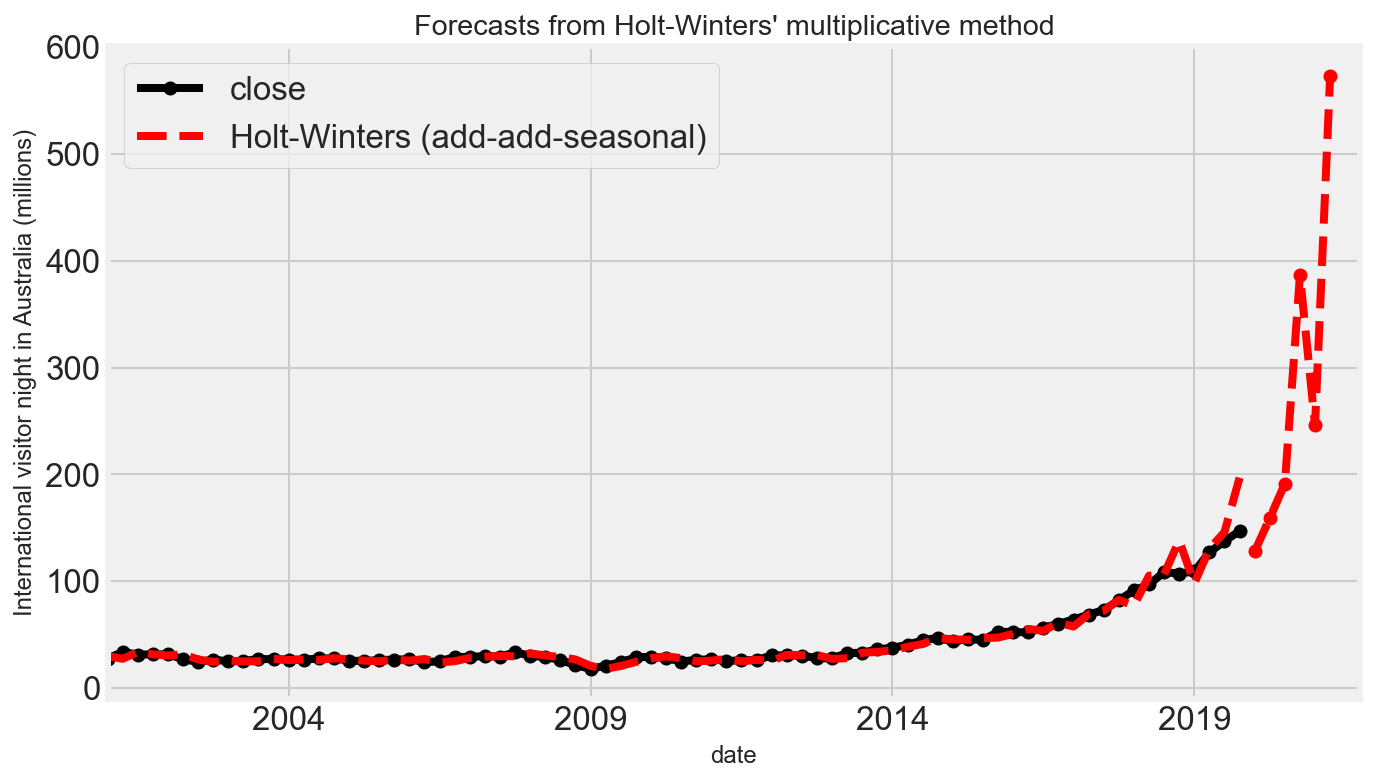

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive
$\alpha$,0.995000
$\beta$,0.035535
$\phi$,NaN
$\gamma$,0.005000
$l_0$,0.679968
$b_0$,-0.000066
SSE,4380.898472


In [92]:
fit1 = ExponentialSmoothing(df_train, seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()

results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]

ax = df_train.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

In [77]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

AttributeError: 'int' object has no attribute 'size'

In [74]:
print(pred)

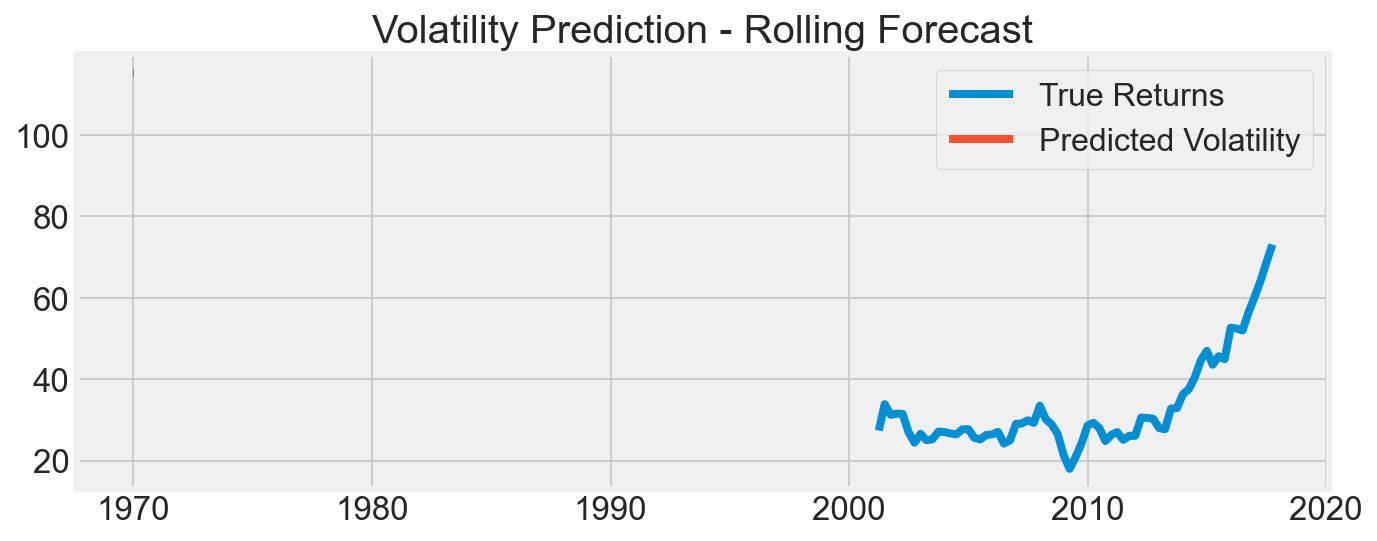

In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                      -0.306
Mean Model:             Constant Mean   Adj. R-squared:                 -0.306
Vol Model:                      GARCH   Log-Likelihood:               -251.818
Distribution:                  Normal   AIC:                           515.636
Method:            Maximum Likelihood   BIC:                           529.620
                                        No. Observations:                   76
Date:                Sat, Feb 06 2021   Df Residuals:                       70
Time:                        20:37:17   Df Model:                            6
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            26.6623      0.376     70.939      0.000 [ 25.926, 27.399]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.6911      1.333      1.269      0.204    [ -0.921,  4.303]
alpha[1]       0.7772      0.145      5.358  8.422e-08    [  0.493,  1.061]
alpha[2]       0.0000      0.191      0.000      1.000    [ -0.375,  0.375]
beta[1]        0.0954      0.134      0.712      0.476    [ -0.167,  0.358]
beta[2]        0.1275  7.233e-02      1.762  7.805e-02 [-1.431e-02,  0.269]
===========================================================================

Covariance estimator: robust
"""

TypeError: float() argument must be a string or a number, not 'ARCHModelForecast'

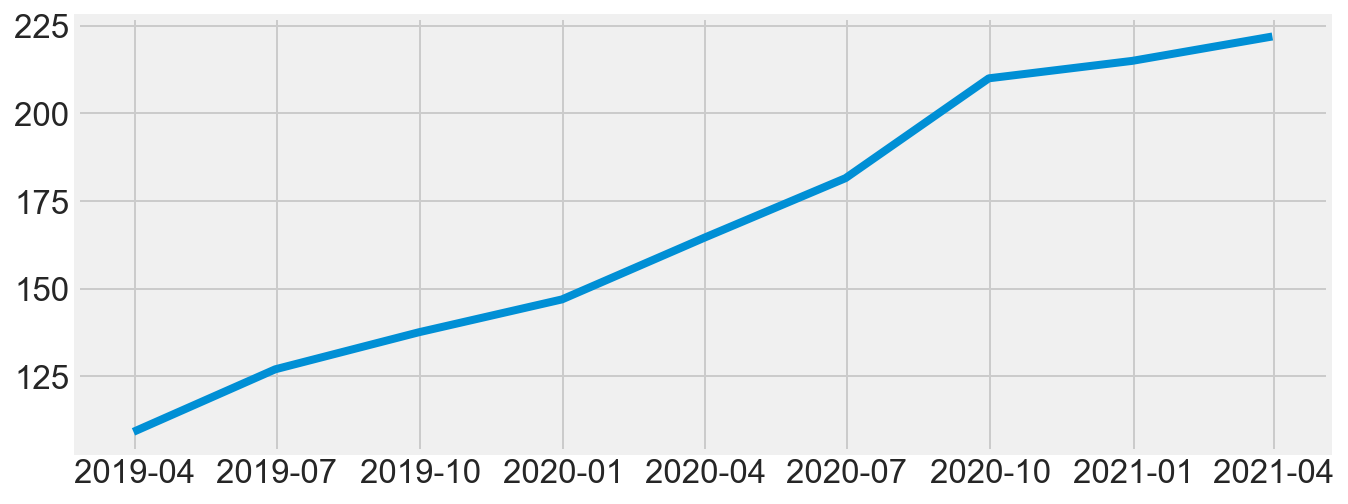

In [53]:
plt.figure(figsize=(10,4))
true = plt.plot(df_test['close'])
preds = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Returns', 'Predicted Volatility'])

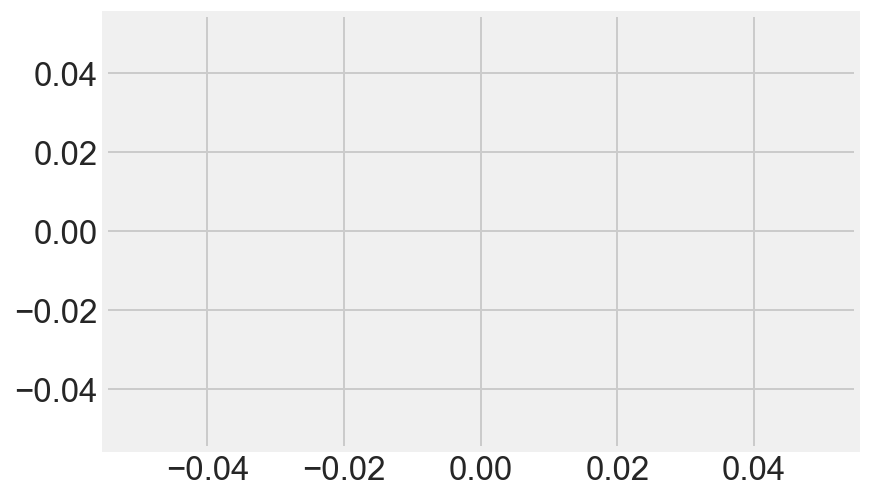

In [35]:
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))

In [13]:
df=data[['close']]
print(df.shape)
df.head()

NameError: name 'data' is not defined

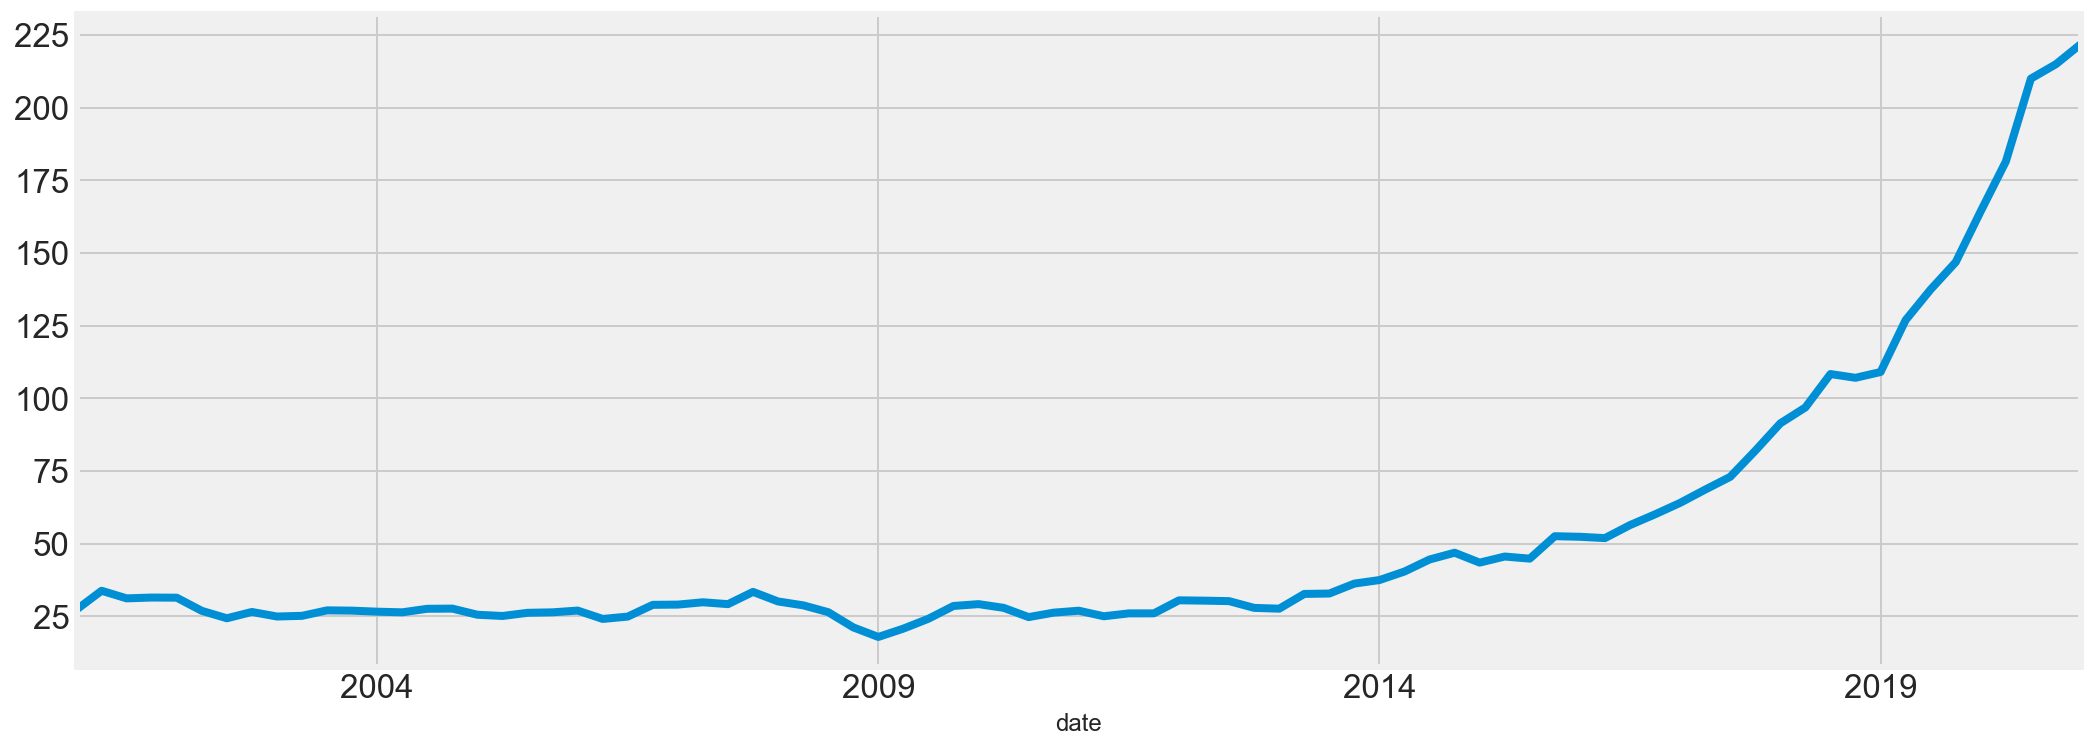

In [117]:
subset_df['close'].plot(figsize=(16, 6))
plt.show()

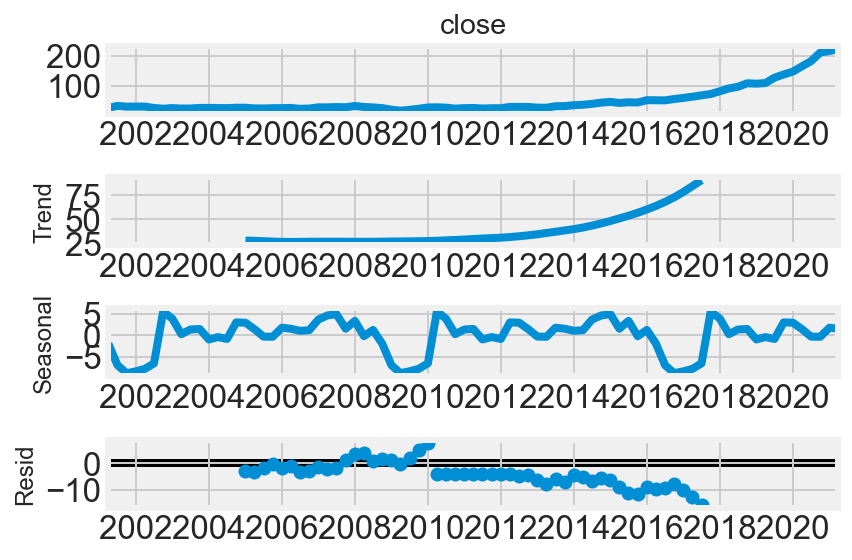

In [118]:
result = seasonal_decompose(subset_df['close'],freq=30)
result.plot();

In [119]:
adf_test(subset_df['close'])

Augmented Dickey-Fuller Test: 
ADF test statistic       3.401597
p-value                  1.000000
# lags used             12.000000
# observations          68.000000
critical value (1%)     -3.530399
critical value (5%)     -2.905087
critical value (10%)    -2.590001
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [110]:
from matplotlib import pyplot
from arch import arch_model

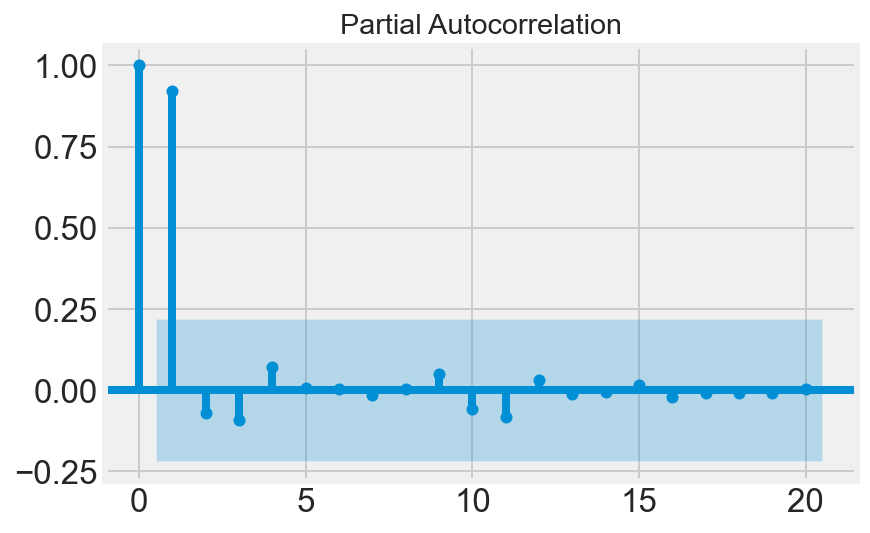

In [120]:
plot_pacf(subset_df['close'])
pyplot.show()

In [112]:
data.index.max(), data.index.min()

(4999, 0)

In [122]:
df_train

,close
date,
2001-03-31,27.369318
2001-06-30,33.851210
2001-09-30,31.238390
2001-12-31,31.523672
2002-03-31,31.466250
...,...
2018-12-31,107.119206
2019-03-31,109.102951
2019-06-30,126.955397


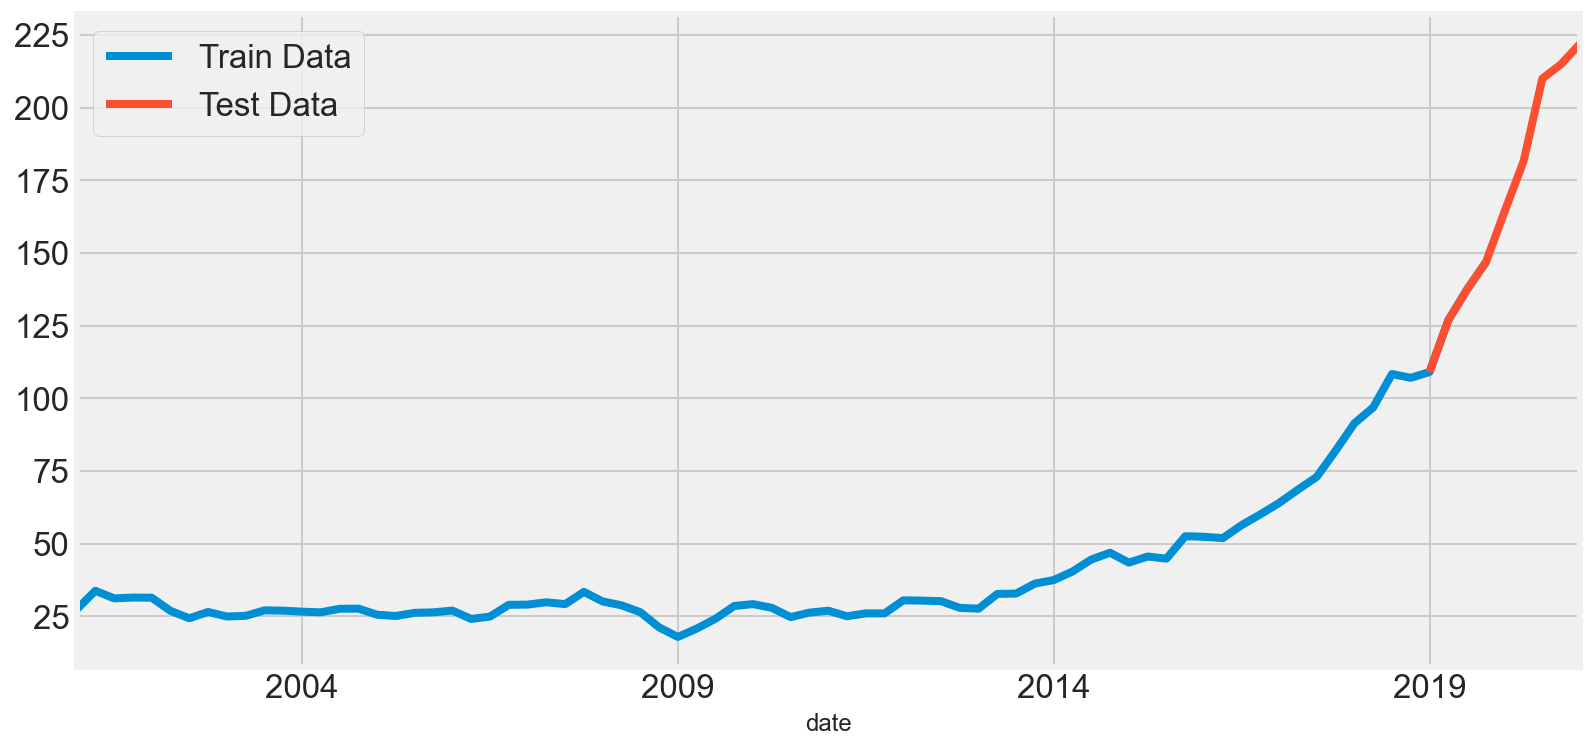

In [123]:
fig, ax = plt.subplots(figsize=(12,6))
df_train.plot(ax=ax)
df_test.plot(ax=ax)
ax.legend(labels=['Train Data','Test Data']);


In [17]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

-----

# ses

In [124]:
, Holt

In [140]:
model = SimpleExpSmoothing(df_train)
ses = model.fit()
ses.summary()

Dep. Variable:,close,No. Observations:,76
Model:,SimpleExpSmoothing,SSE,1370.646
Optimized:,True,AIC,223.815
Trend:,None,BIC,228.477
Seasonal:,None,AICC,224.378
Seasonal Periods:,None,Date:,"Thu, 04 Feb 2021"
Box-Cox:,False,Time:,12:31:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,27.369314,l.0,True


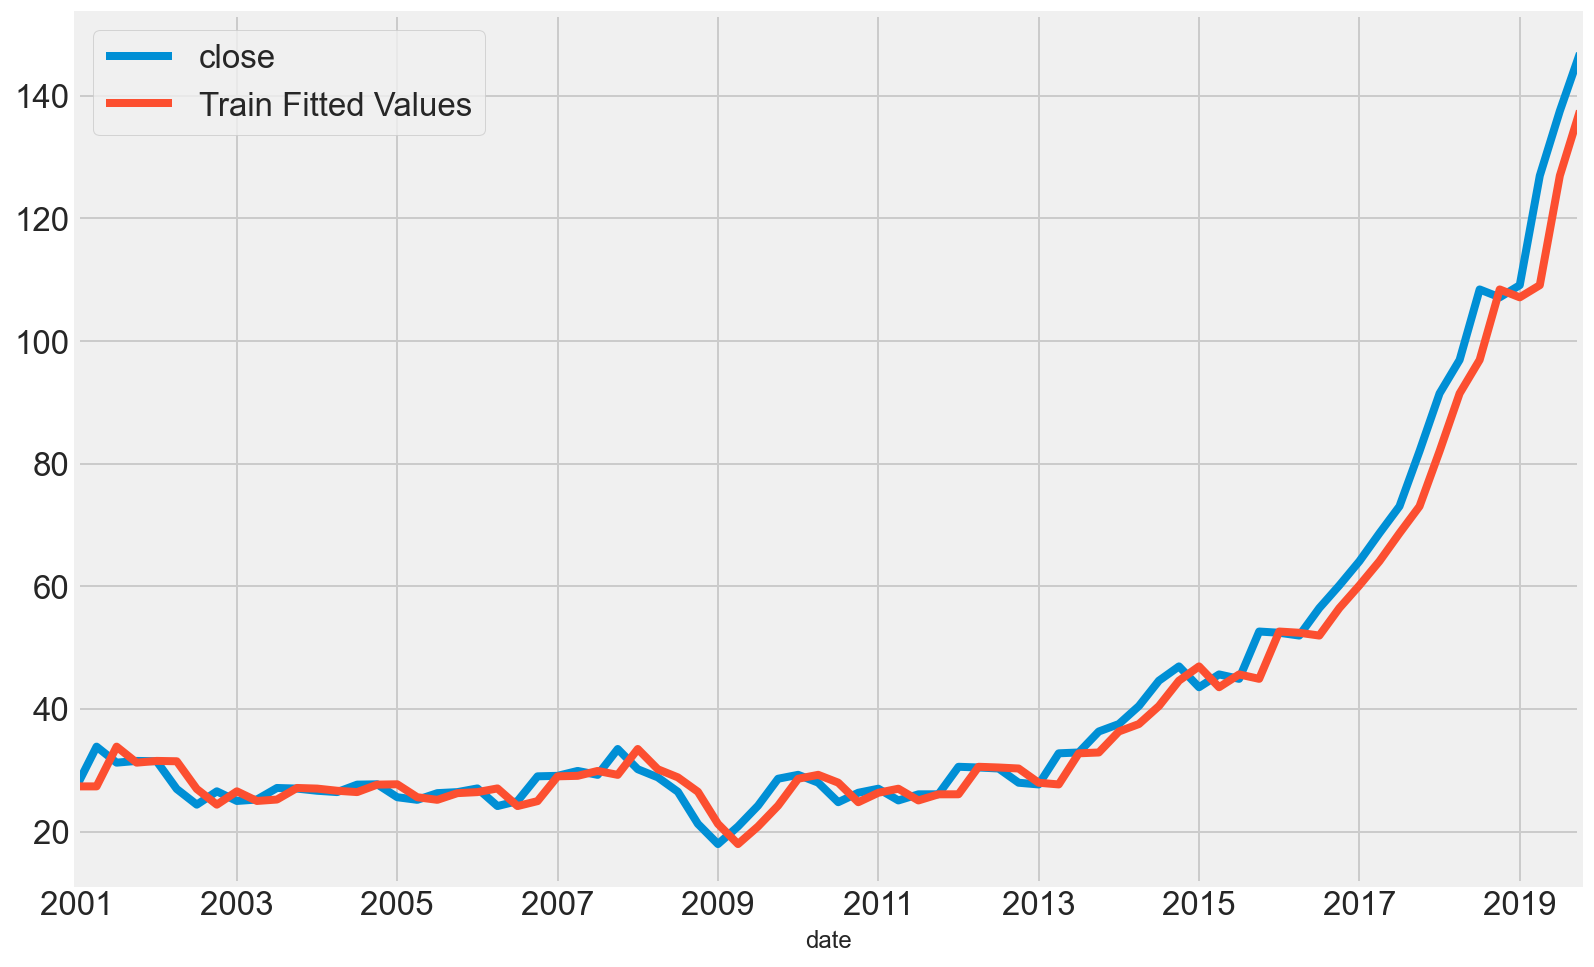

In [141]:
df_train.dropna().plot(legend = True,figsize=(12,8))
ses.fittedvalues.rename("Train Fitted Values").plot(legend = True)
plt.show()

In [142]:
start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

# Notice below typ='level' , it will predict the levels of the original variables (undifferenced)
predictions = ses.predict(start, end) .rename("Test predicted")  

In [143]:
predictions

2020-03-31    146.90547
2020-06-30    146.90547
2020-09-30    146.90547
2020-12-31    146.90547
2021-03-31    146.90547
2021-06-30    146.90547
2021-09-30    146.90547
2021-12-31    146.90547
2022-03-31    146.90547
Freq: Q-DEC, Name: Test predicted, dtype: float64

In [144]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<4.4}, expected={df_test['close'][i]}")

predicted=146.9, expected=109.10295081967213
predicted=146.9, expected=126.95539682539679
predicted=146.9, expected=137.51328109375004
predicted=146.9, expected=146.90547
predicted=146.9, expected=164.4490325806452
predicted=146.9, expected=181.52395222222222
predicted=146.9, expected=210.03015312499994
predicted=146.9, expected=215.01015531250002
predicted=146.9, expected=221.97526105263157


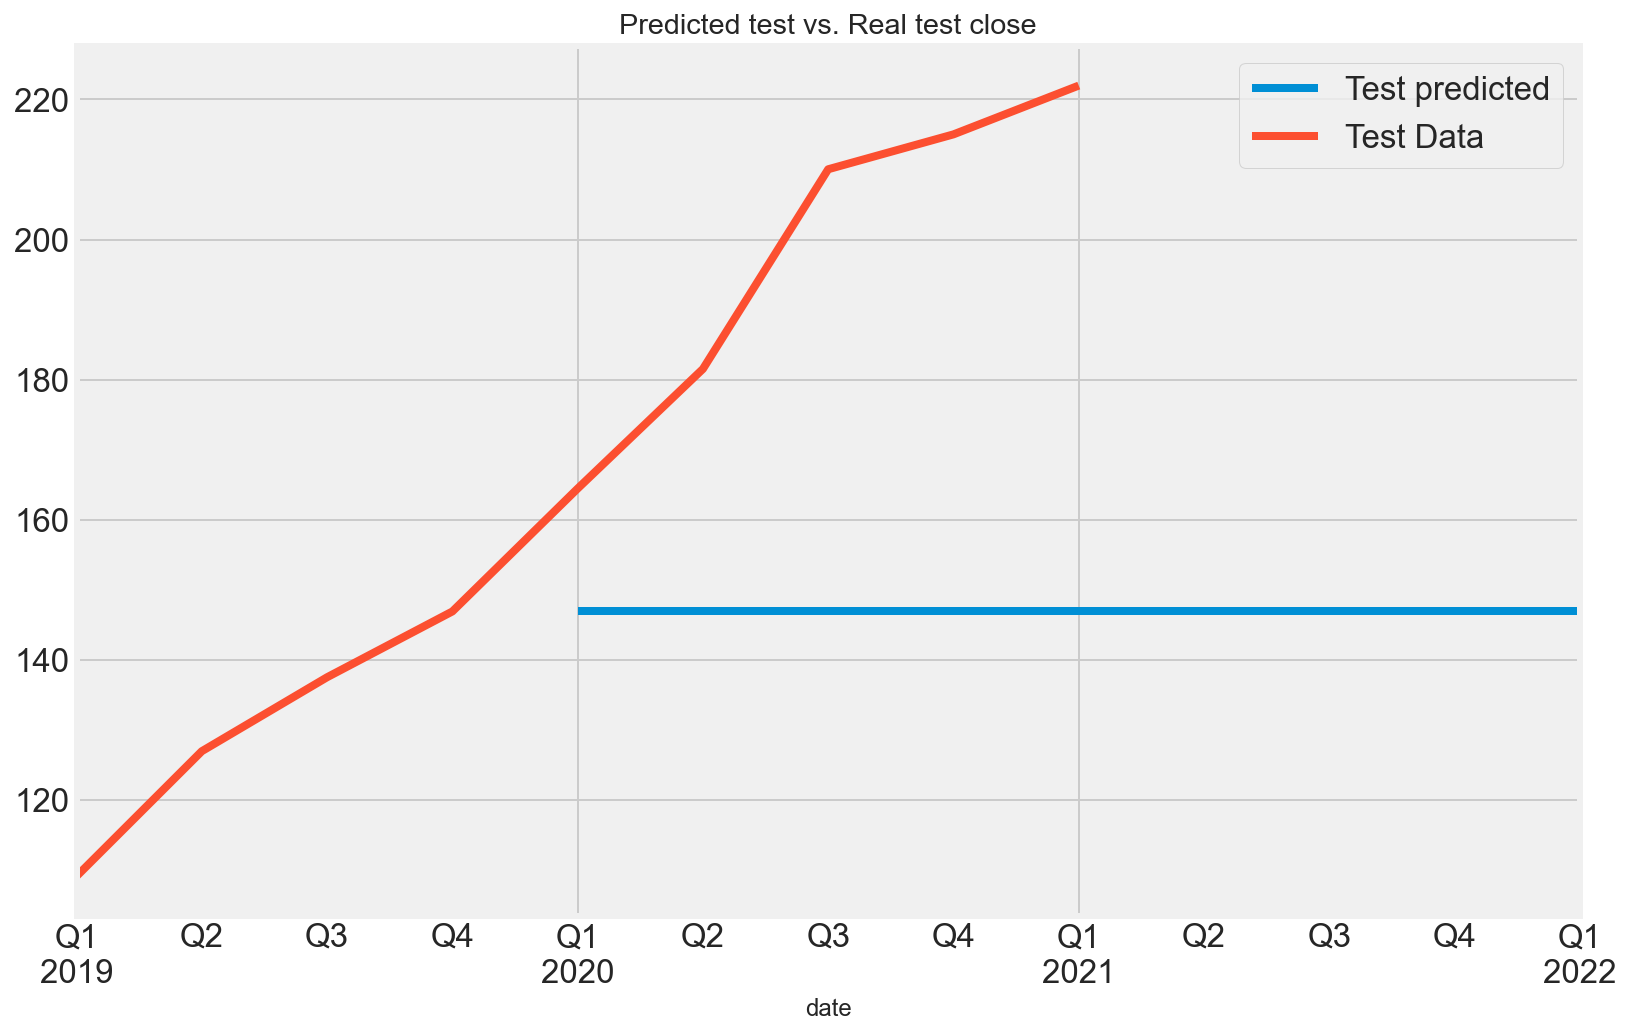

In [145]:
title = 'Predicted test vs. Real test close'
ax=predictions.plot(legend = True,figsize=(12,8),title=title) 
df_test.plot(legend = True,ax=ax);
ax.legend(labels=['Test predicted','Test Data']);

In [146]:
from statsmodels.tools.eval_measures import rmse

error = rmse(df_test['close'], predictions)
print(f'ARIMA(0,2,1) RMSE Error: {error:11.10}')

ARIMA(0,2,1) RMSE Error: 44.32194384


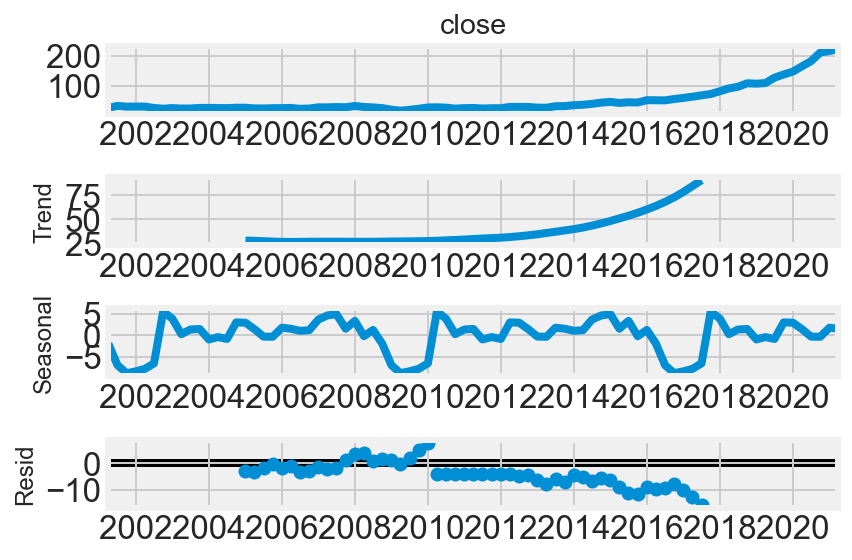

In [153]:
result = seasonal_decompose(subset_df['close'],freq=30)
result.plot();

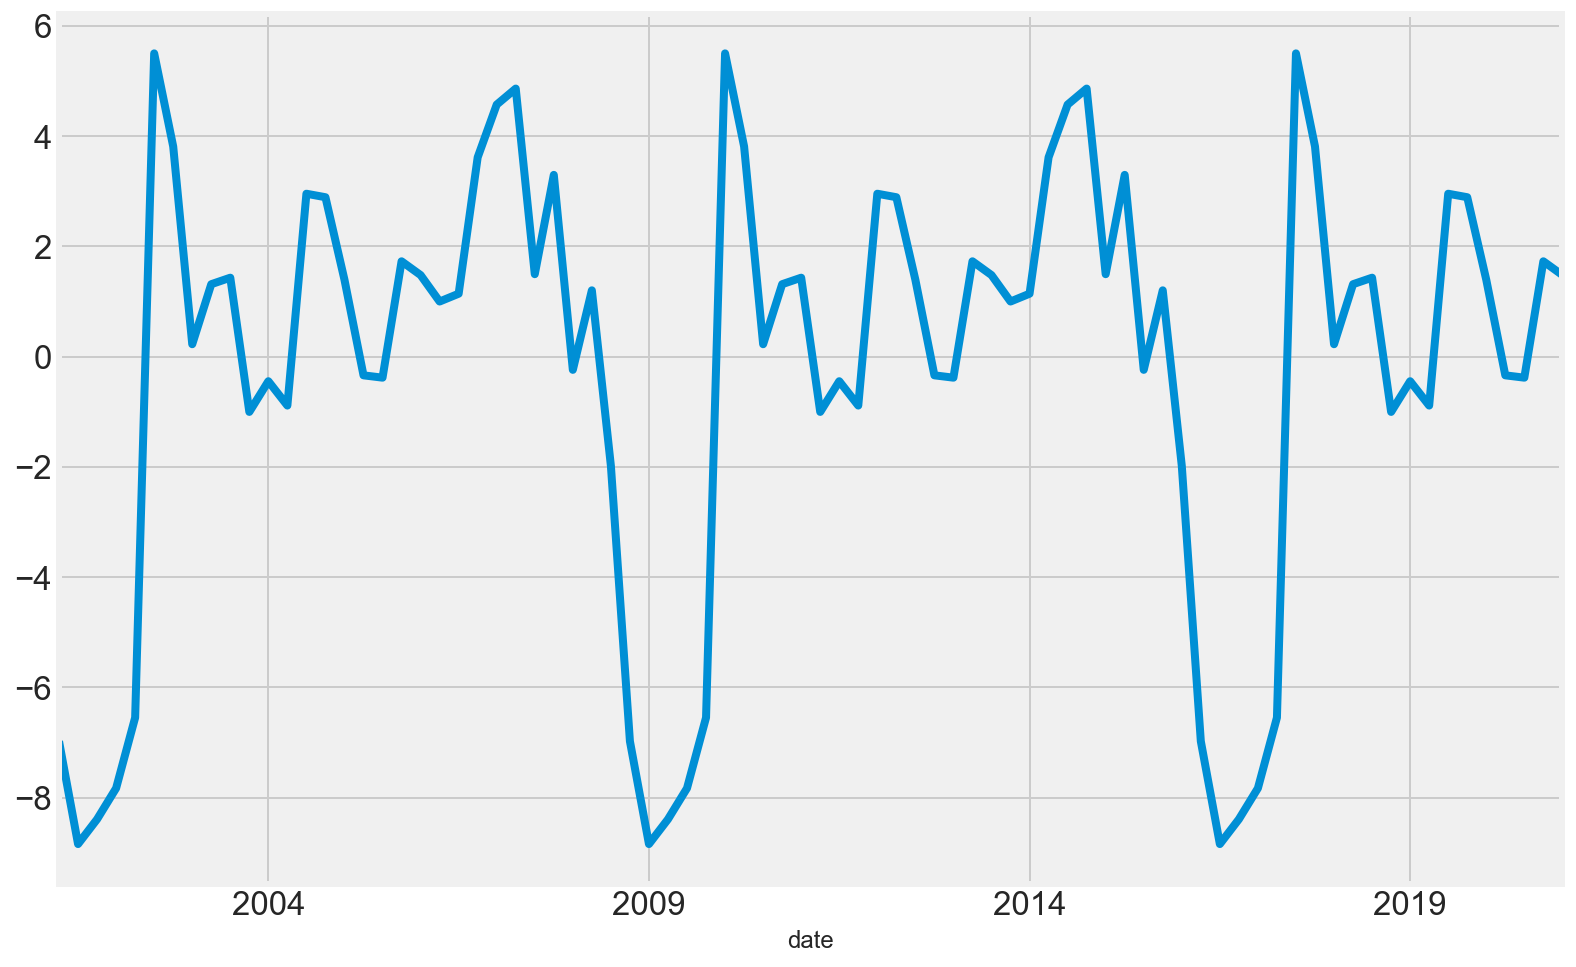

In [154]:
ax=result.seasonal[1:120].plot(figsize=(12,8))

In [85]:
from statsmodels.tsa.api import AutoReg

mod = AutoReg(df_train, 1, trend="n", )
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  close   No. Observations:                 4981
Model:                     AutoReg(1)   Log Likelihood               -8391.285
Method:               Conditional MLE   S.D. of innovations              1.305
Date:                Thu, 04 Feb 2021   AIC                              0.533
Time:                        10:57:57   BIC                              0.536
Sample:                             1   HQIC                             0.534
                                 4981                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
close.L1       1.0009      0.000   3599.991      0.000       1.000       1.001
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\ma455\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


---

<AxesSubplot:xlabel='date'>

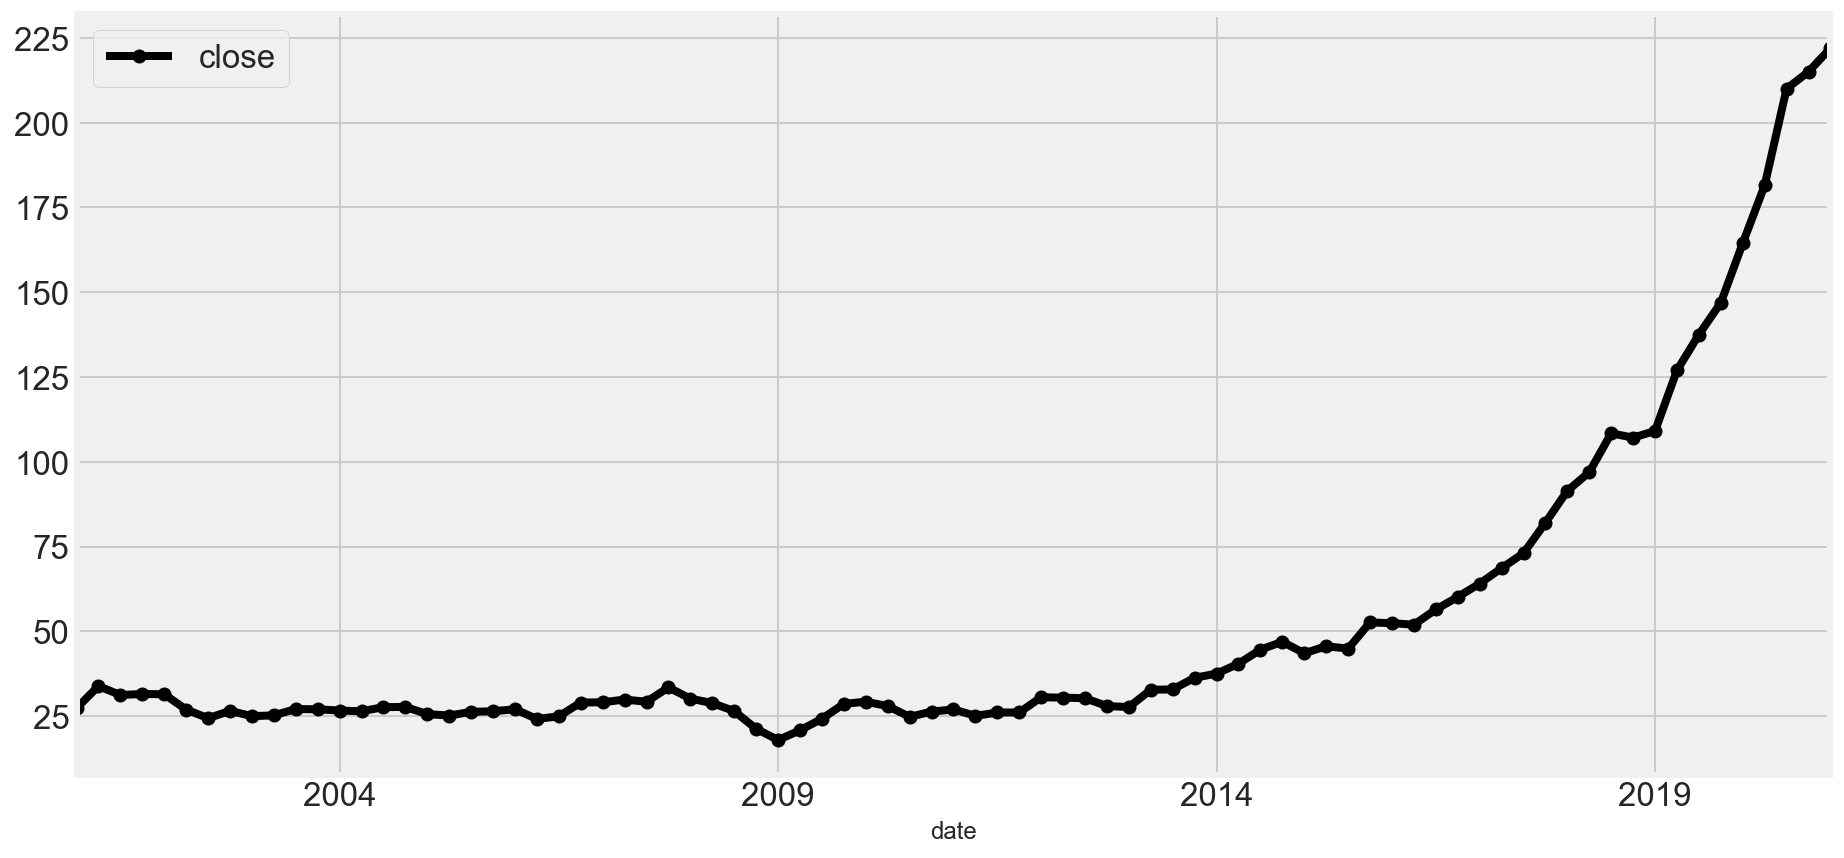

In [164]:
subset_df.plot(marker='o', color='black', legend=True, figsize=(14, 7))

In [165]:
from statsmodels.tsa.api import ExponentialSmoothing    
    

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")

In [93]:
model = ExponentialSmoothing(df_train, seasonal_periods = 12, trend='add', seasonal='add')
ei = model.fit(use_boxcox=True)
ei.summary()

Dep. Variable:,close,No. Observations:,76
Model:,ExponentialSmoothing,SSE,57466.973
Optimized:,True,AIC,535.746
Trend:,Additive,BIC,573.037
Seasonal:,Additive,AICC,547.746
Seasonal Periods:,12,Date:,"Sat, 06 Feb 2021"
Box-Cox:,True,Time:,22:39:03
Box-Cox Coeff.:,-1.46075,,
,coeff,code,optimized
smoothing_level,0.8536059,alpha,True
smoothing_trend,7.7545e-05,beta,True


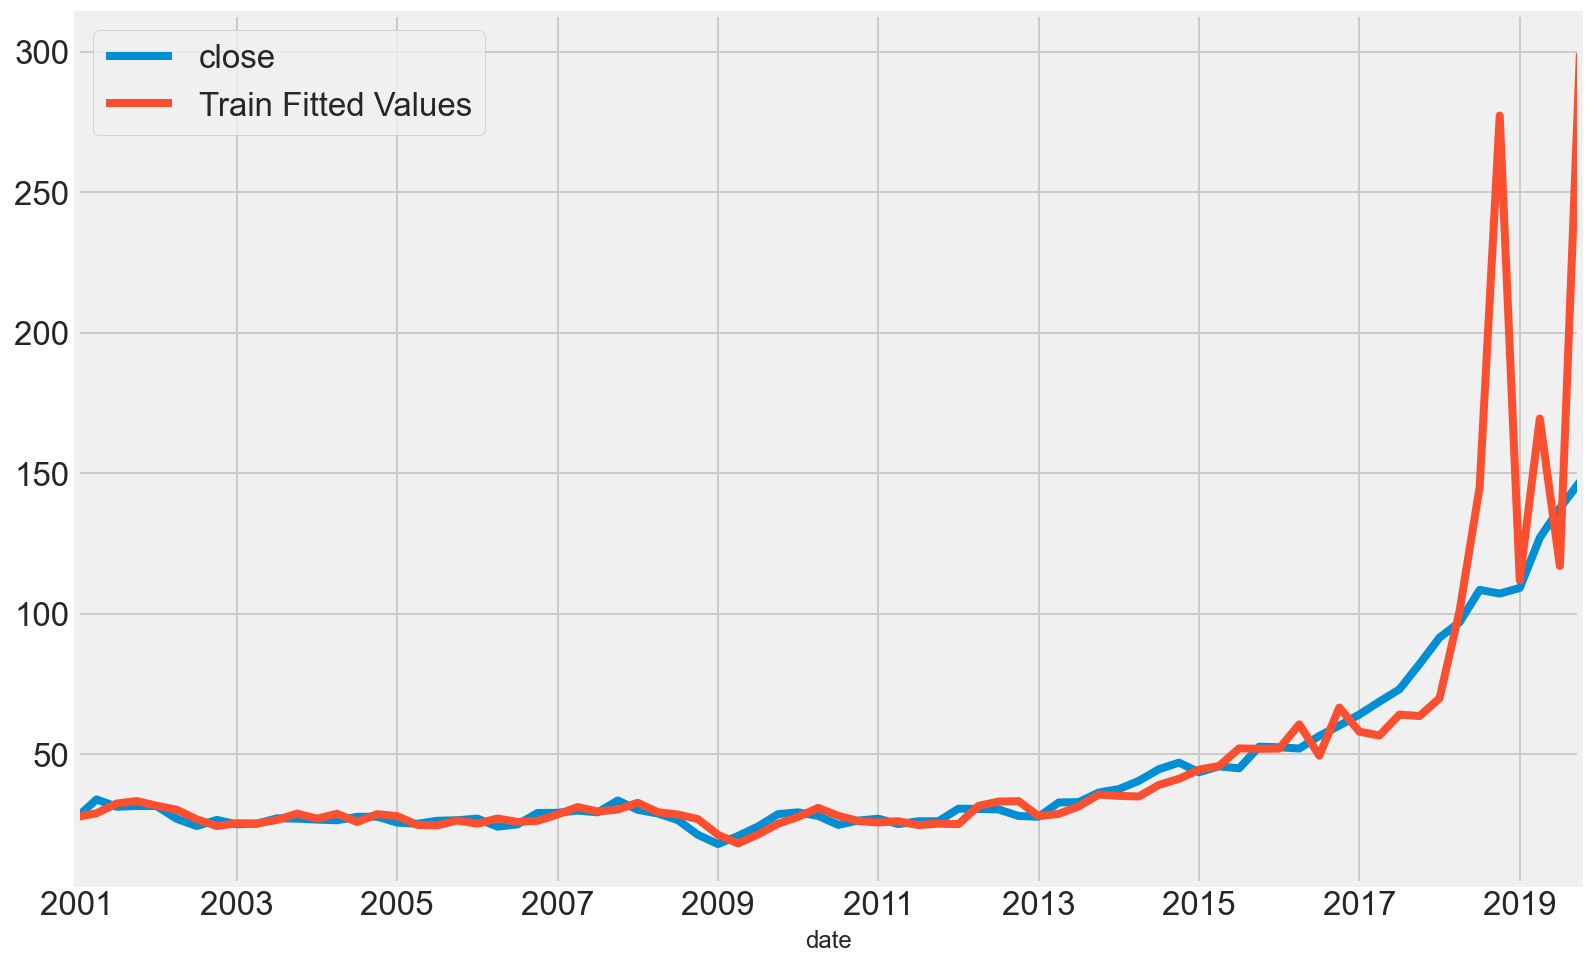

In [94]:
df_train.dropna().plot(legend = True,figsize=(12,8))
ei.fittedvalues.rename("Train Fitted Values").plot(legend = True)
plt.show()

In [95]:
start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

# Notice below typ='level' , it will predict the levels of the original variables (undifferenced)
predictions = ei.predict(start, end).rename("Test predicted")  

In [96]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<4.4}, expected={df_test['close'][i]}")

predicted=143.7, expected=109.10295081967213
predicted=108.5, expected=126.95539682539679
predicted=98.46, expected=137.51328109375004
predicted=83.89, expected=146.90547
predicted=73.6, expected=164.4490325806452
predicted=78.68, expected=181.52395222222222
predicted=100.1, expected=210.03015312499994
predicted=176.9, expected=215.01015531250002
predicted=192.7, expected=221.97526105263157


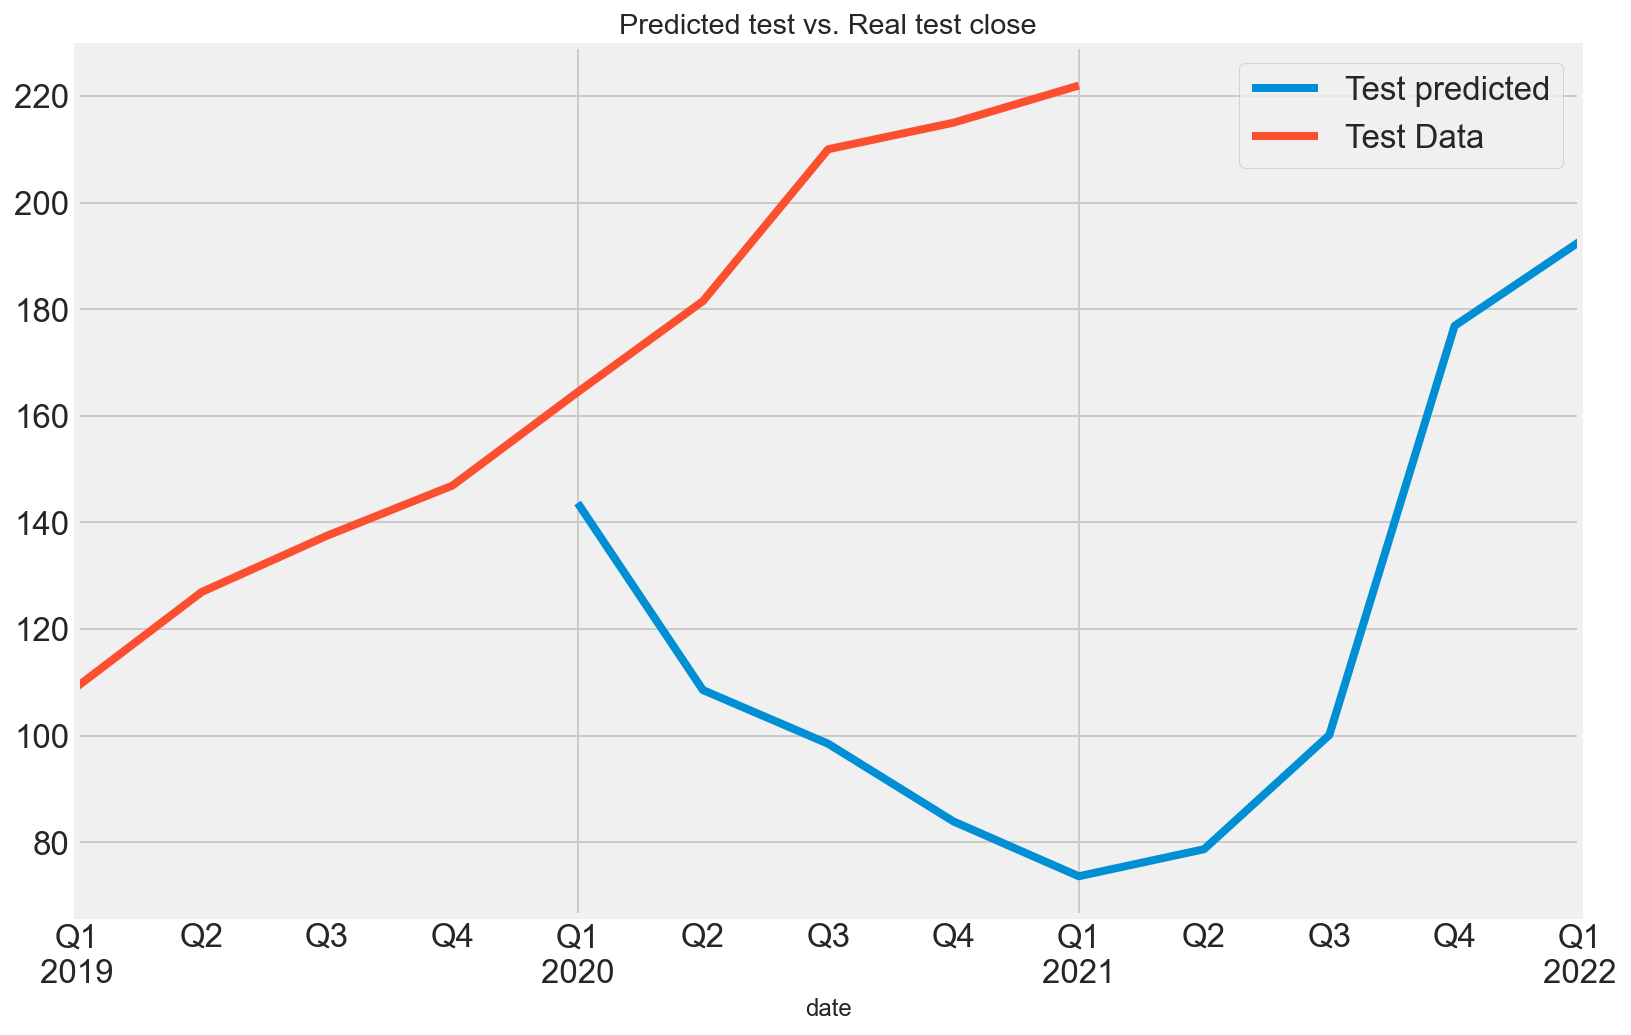

In [97]:
title = 'Predicted test vs. Real test close'
ax=predictions.plot(legend = True,figsize=(12,8),title=title) 
df_test.plot(legend = True,ax=ax);
ax.legend(labels=['Test predicted','Test Data']);

In [99]:
from statsmodels.tools.eval_measures import rmse

error = rmse(df_test['close'], predictions)
print(f'ARIMA(0,2,1) RMSE Error: {error:11.10}')

ARIMA(0,2,1) RMSE Error: 66.87610134


In [200]:
fit1 = ExponentialSmoothing(np.asarray(df_train['close']) ,seasonal_periods=7 ,trend='add', seasonal='add')
fit1.fit(use_boxcox=True)
df_test['forcast'] = fit1.forecast(len(df_test))

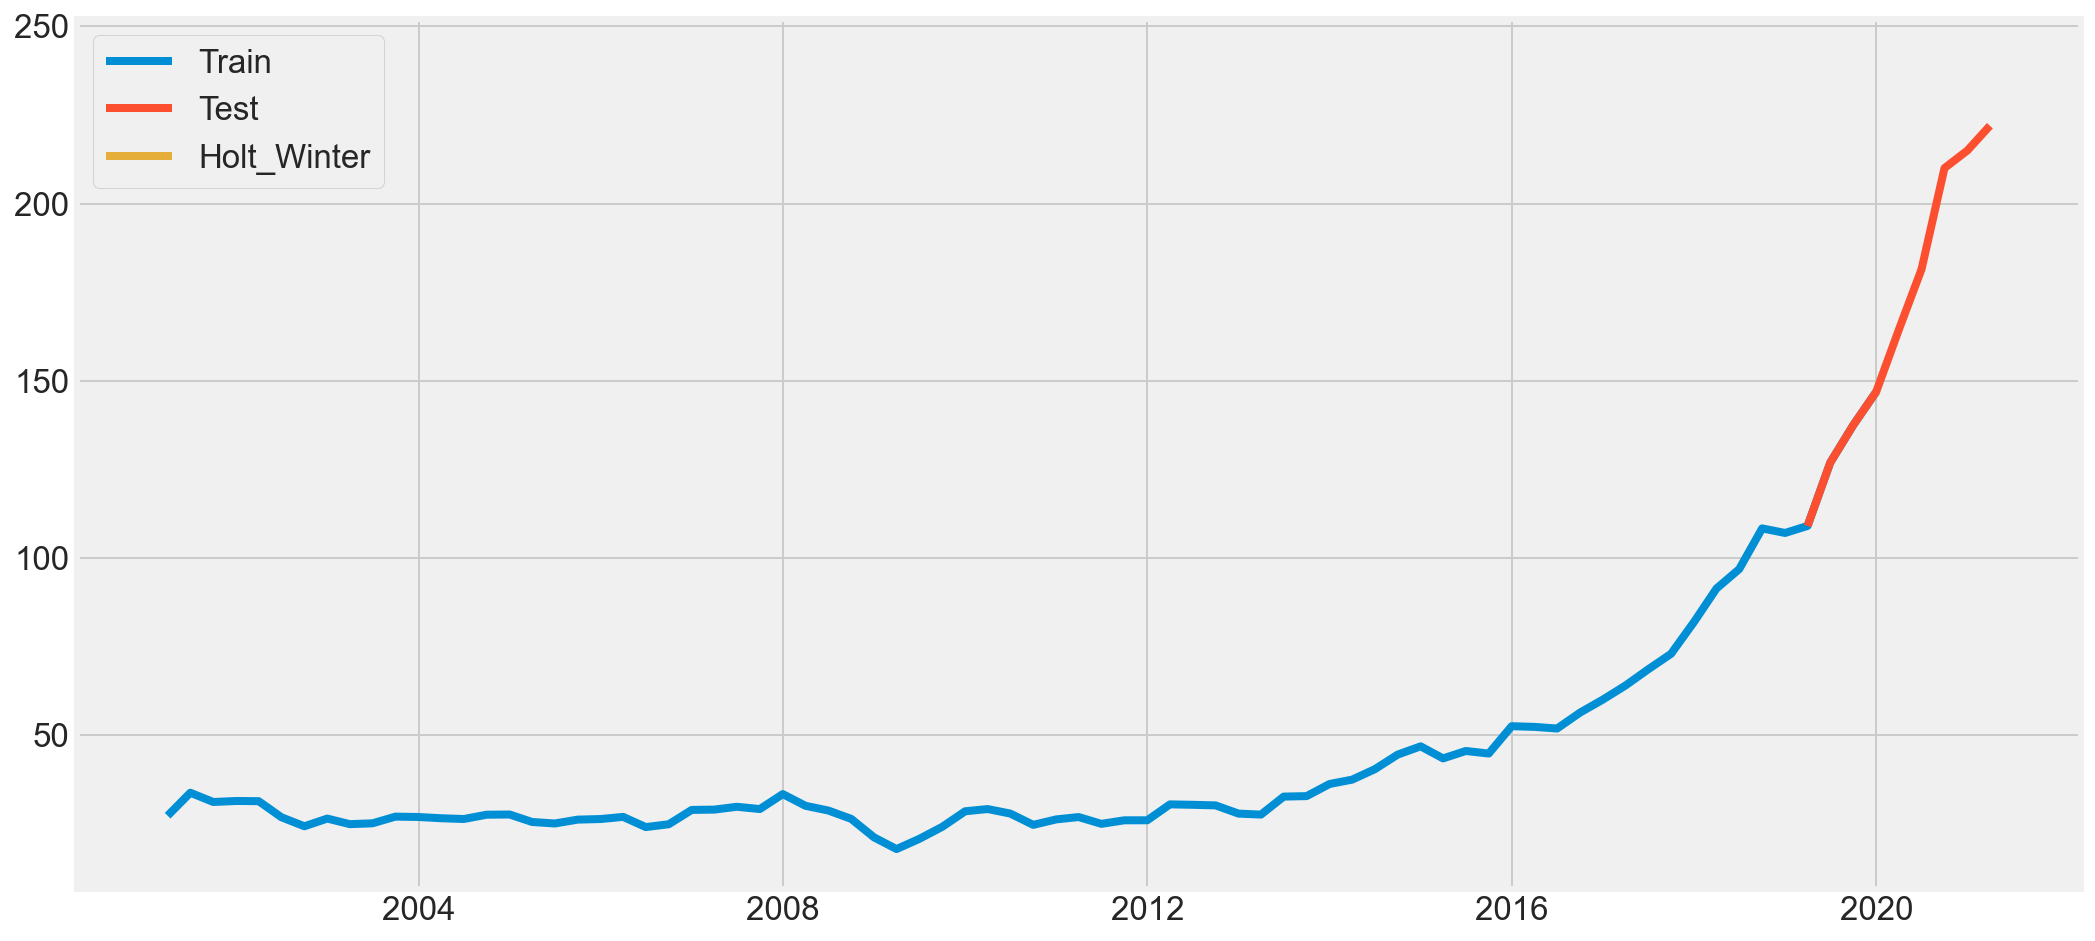

In [201]:
plt.figure(figsize=(16,8))
plt.plot(df_train['close'], label='Train')
plt.plot(df_test['close'], label='Test')
plt.plot(df_test['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [203]:
start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

# Notice below typ='level' , it will predict the levels of the original variables (undifferenced)
predictions = fit1.predict(start, end)

In [205]:
predictions

array([240.9769,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan])

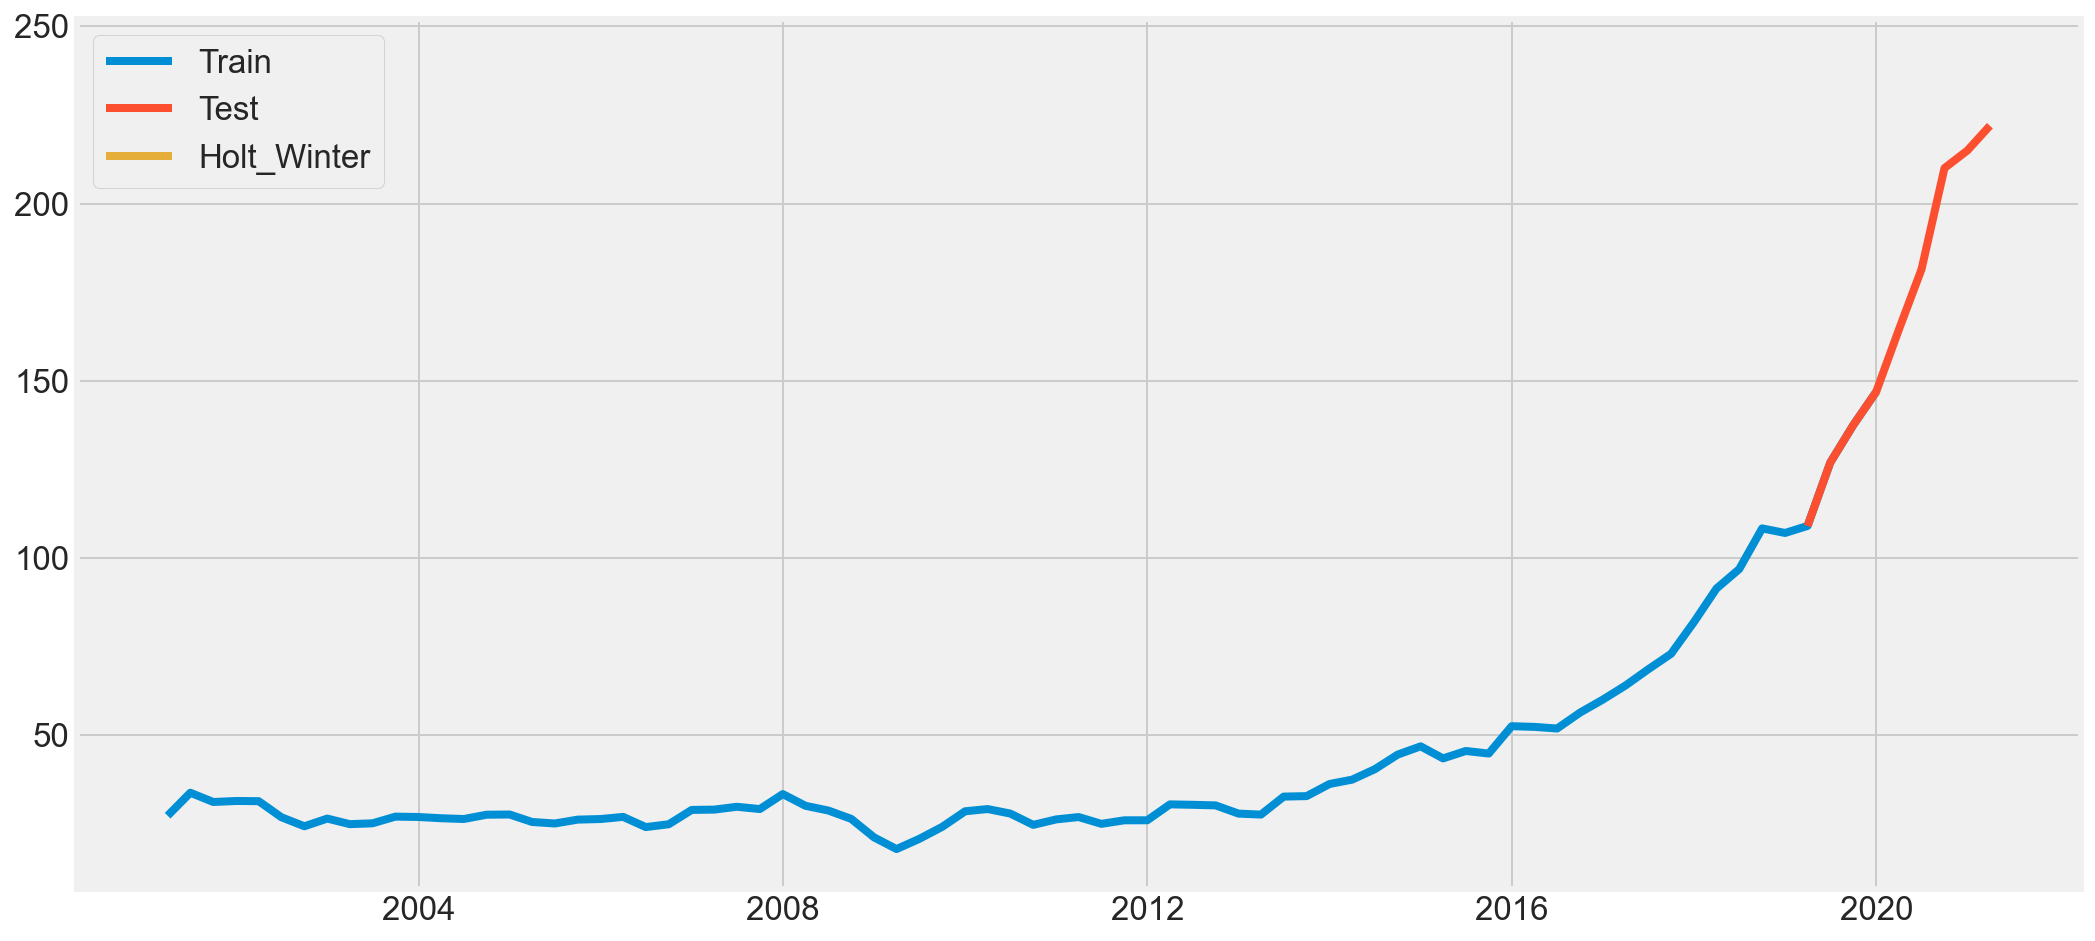

In [194]:
fit1 = ExponentialSmoothing(np.asarray(df_train['close']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit(use_boxcox=True)
df_test['Holt_Winter'] = fit1.forecast(len(df_test))
plt.figure(figsize=(16,8))
plt.plot(df_train['close'], label='Train')
plt.plot(df_test['close'], label='Test')
plt.plot(df_test['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [192]:
start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

# Notice below typ='level' , it will predict the levels of the original variables (undifferenced)
predictions = ses.predict(start, end) .rename("Test predicted")  

In [159]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
# split dataset
# train autoregression
window = 29
model = AutoReg(df_train, lags=29)
model_fit = model.fit()
coef = model_fit.params

AttributeError: 'AutoReg' object has no attribute 'plot'

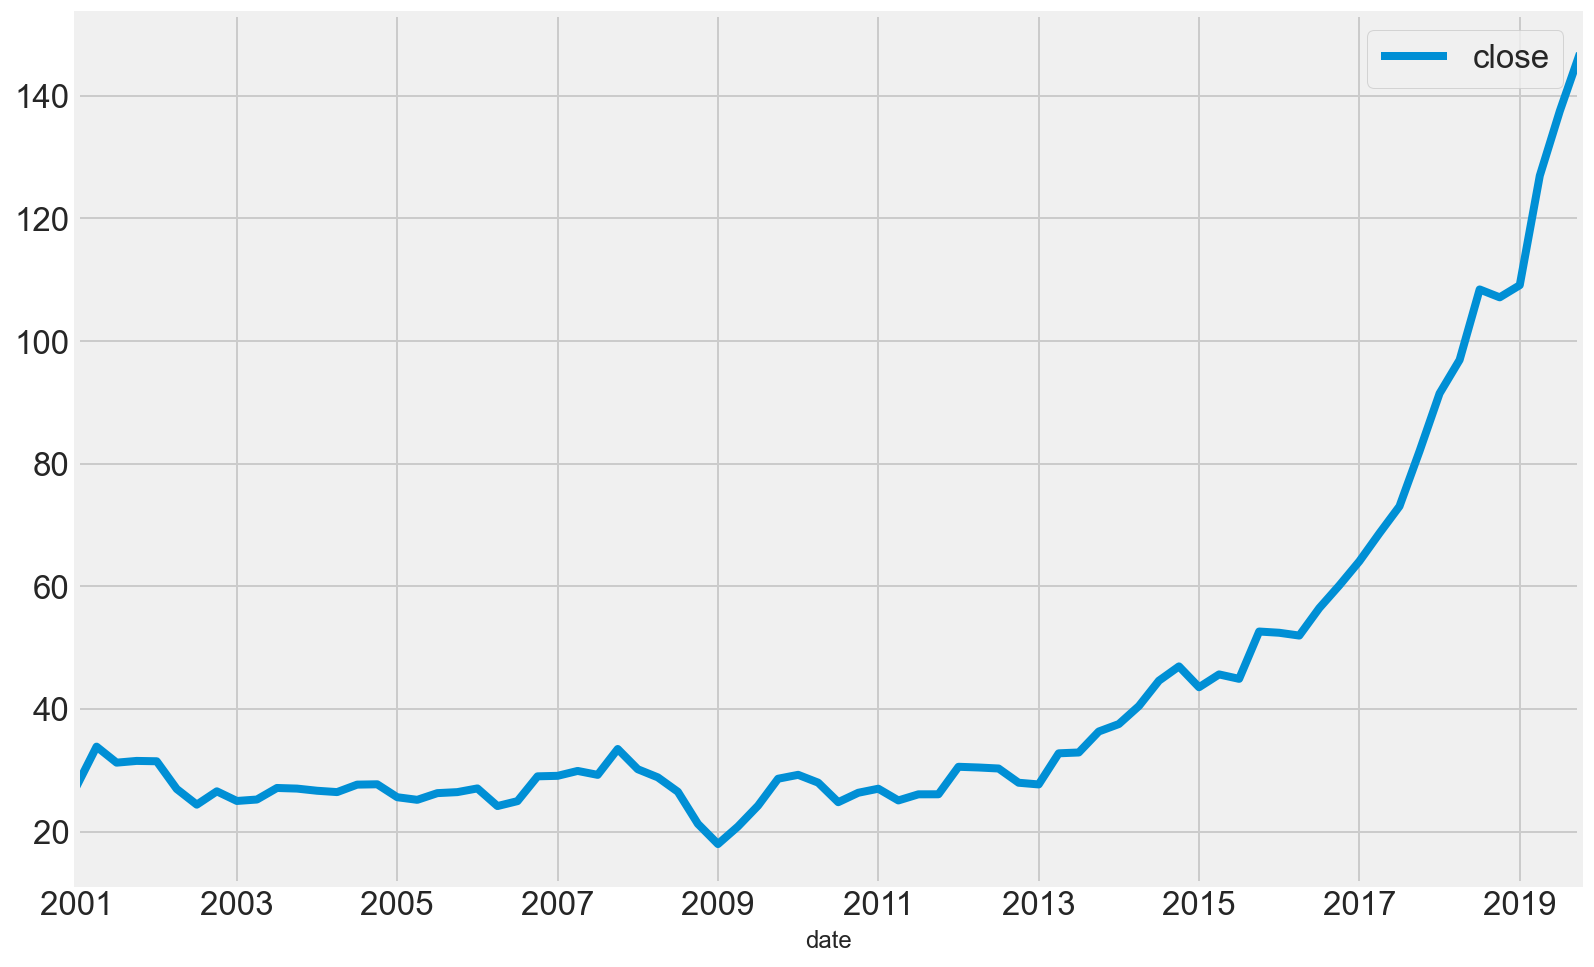

In [162]:
df_train.dropna().plot(legend = True,figsize=(12,8))
model.plot(legend = True)
plt.show()

In [157]:
history = df_train[len(df_train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


KeyError: 0

In [89]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [90]:
model = SimpleExpSmoothing(df_train)
res = model.fit(smoothing_level=0.2,optimized=False)
res.summary()

Dep. Variable:,close,No. Observations:,4981
Model:,SimpleExpSmoothing,SSE,15477.336
Optimized:,False,AIC,5651.189
Trend:,None,BIC,5664.216
Seasonal:,None,AICC,5651.197
Seasonal Periods:,None,Date:,"Thu, 04 Feb 2021"
Box-Cox:,False,Time:,12:14:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
initial_level,27.281250,l.0,False


AttributeError: 'ARCHModelResult' object has no attribute 'fittedvalues'

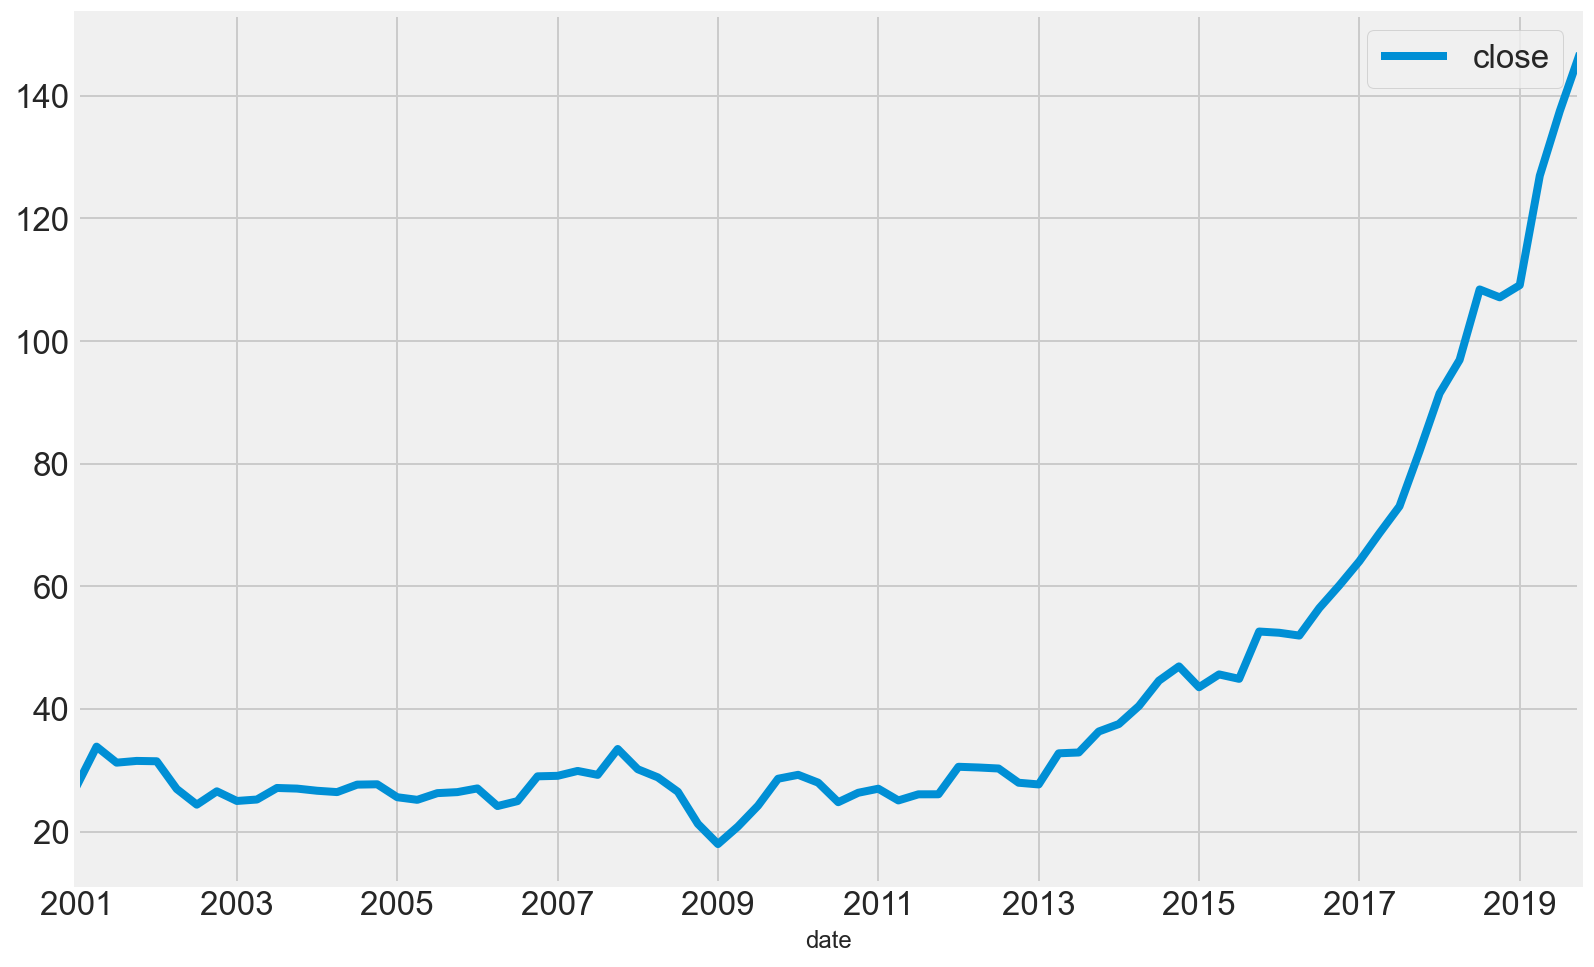

In [102]:
df_train.dropna().plot(legend = True,figsize=(12,8))
res.fittedvalues.rename("Train Fitted Values").plot(legend = True)
plt.show()

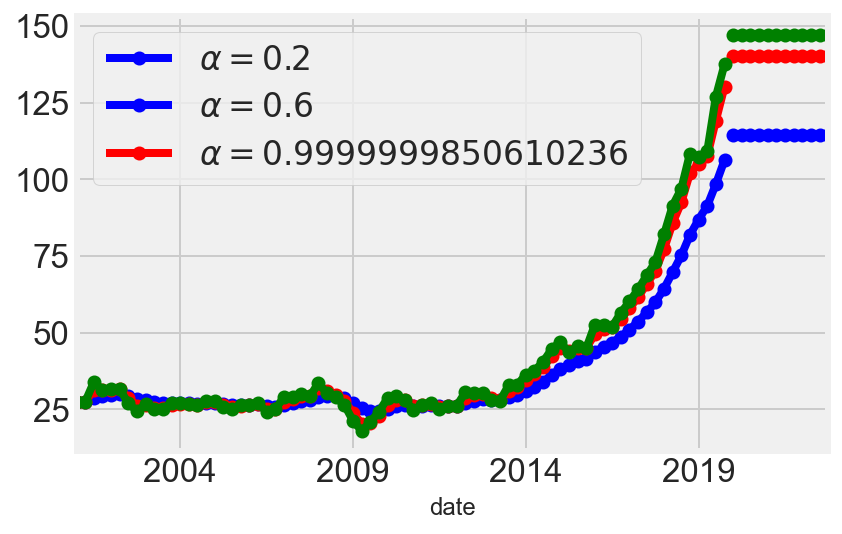

In [135]:



fit2 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(df_train).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

In [20]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
# fit model
model = SimpleExpSmoothing(df_train)
model_fit = model.fit()
# make prediction

5000    222.384102
dtype: float64


C:\Users\ma455\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ma455\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [46]:
# Obtain predicted values
start=len(df_train)
end=len(df_train)+len(df_test)-1
predictions1 = model_fit.predict(start=start, end=end ).rename('SES Predictions')

TypeError: predict() got an unexpected keyword argument 'type'

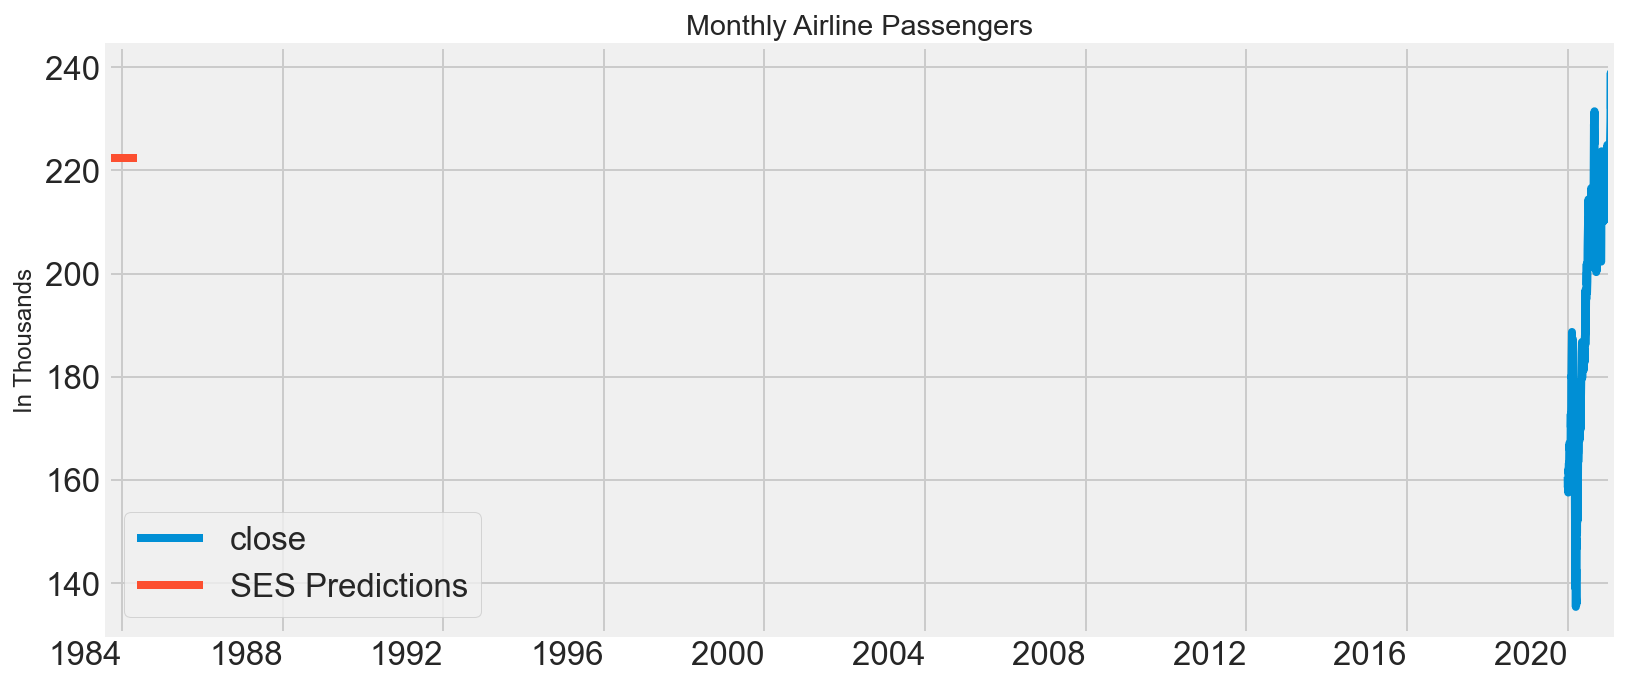

In [47]:
# Plot predictions against known values
title = 'Monthly Airline Passengers'
ylabel='In Thousands'
xlabel=''

ax = df_test.plot(legend=True,figsize=(12,6),title=title)
predictions1.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [33]:
df_test

date
2020-01-02    160.62000
2020-01-03    158.62000
2020-01-06    159.03000
2020-01-07    157.58000
2020-01-08    160.09000
                ...    
2021-01-25    229.53000
2021-01-26    232.33000
2021-01-27    232.89999
2021-01-28    238.92999
2021-01-29    231.96001
Name: close, Length: 272, dtype: float64

In [43]:
for i in range(len(predictions1)):
    print(predictions1)

KeyError: 0

In [76]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           HAR - ARCH Model Results                           
==============================================================================
Dep. Variable:                  close   R-squared:                      -0.283
Mean Model:                       HAR   Adj. R-squared:                 -0.283
Vol Model:                       ARCH   Log-Likelihood:               -15938.9
Distribution:                  Normal   AIC:                           31883.8
Method:            Maximum Likelihood   BIC:                           31903.3
                                        No. Observations:                 4981
Date:                Wed, Feb 03 2021   Df Residuals:                     4978
Time:                        11:27:11   Df Model:                            3
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const         27.0627  8.751e-02    309.262      0.000 [ 26.891, 27.234]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1610  2.371e-02      6.789  1.126e-11 [  0.115,  0.207]
alpha[1]       1.0000  8.125e-03    123.073      0.000 [  0.984,  1.016]
========================================================================

Covariance estimator: robust
"""

In [85]:
yhat = model_fit.forecast()

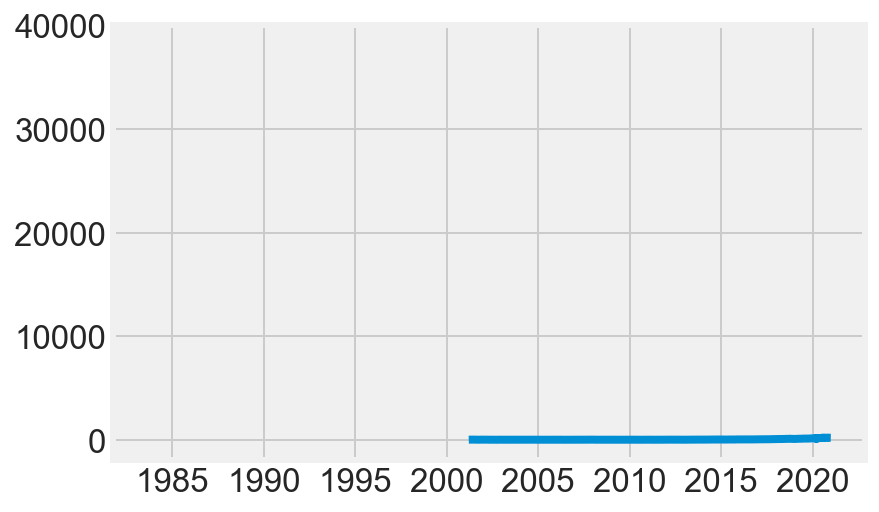

In [86]:
# plot the actual variance
var = df_train
pyplot.plot(var)
# plot forecast variance
pyplot.plot(yhat.variance.values)
pyplot.show()

In [103]:
# !pip install tensorflow

In [99]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,GRU

In [ ]:
x_train = data.loc[:'2020']
y_test = data['close'].loc[:'2020']
df_test = data['close'].loc['2020':]

In [107]:
df_train.shape[1]

5

In [108]:
md = Sequential([
    LSTM(120,input_shape=(df_train.shape[1],1),return_sequences=True),
#     Dropout(0.3),
    LSTM(80,return_sequences=True),
#     Dropout(0.3),    
    LSTM(60,return_sequences=False),
#     Dense(20),
    Dense(1)
])

md.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [109]:
md.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 5, 120)            58560     
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 80)             64320     
_________________________________________________________________
lstm_8 (LSTM)                (None, 60)                33840     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 156,781
Trainable params: 156,781
Non-trainable params: 0
_________________________________________________________________


In [112]:
md.fit()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

----

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
close=data['close'].values
close=np.array(close).reshape(-1,1)

In [116]:
train_size=0.8
train_index=int(len(close)*train_size)
train=close[:train_index]
val=close[train_index:]

In [121]:
scl=MinMaxScaler(feature_range=(0,1))
train_scl=scl.fit_transform(train)
val_scl=scl.transform(val)

In [122]:
def prepare_dataset(data,window=30):
    X=[]
    Y=[]
    for i in range(len(data)-window):
        dummy_X=data[i:i+window]
        dummy_y=data[window+i]
        X.append(dummy_X)
        Y.append(dummy_y)
    return np.array(X),np.array(Y)


In [123]:
train_X,train_y=prepare_dataset(train_scl)
val_X,val_y=prepare_dataset(val_scl)

In [124]:
def rmse(true_y,pred_y):
    return backend.sqrt(backend.mean(backend.square(true_y-pred_y),axis=1))

In [128]:
from keras.layers import LSTM,Dropout,Dense,Input
from keras.models import Sequential,Model

In [129]:
window=30
input_layer=Input(shape=(window,1))
x=LSTM(4)(input_layer)
output=Dense(1,activation='linear')(x)
lstm_model=Model(input_layer,output)
lstm_model.compile(loss='mean_squared_error',optimizer='adam',metrics=[rmse])

In [131]:
from keras import backend


In [137]:
result=lstm_model.fit(df_train)

TypeError: 'NoneType' object is not callable

---